ABOUT DATASET: There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

In [1]:
#importing the models
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('banking-dataset.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
data.shape

(32950, 16)

In [5]:
#data cleaning
data.columns = data.columns.str.lower()
string_columns = list(data.dtypes[data.dtypes == 'object'].index)

for col in string_columns:
    data[col] = data[col].str.lower().str.replace('-', '.')

In [6]:
data.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

In [7]:
data['education'].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [8]:
data['education']=np.where(data['education'] =='basic.9y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'basic', data['education'])

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue.collar,married,basic,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [10]:
#checking for missing values
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [11]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [12]:
data.pdays.replace(to_replace=999, value=np.nan).max()

27.0

In [13]:
data.describe(include="object").T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,6,basic,10013
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


# EDA

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


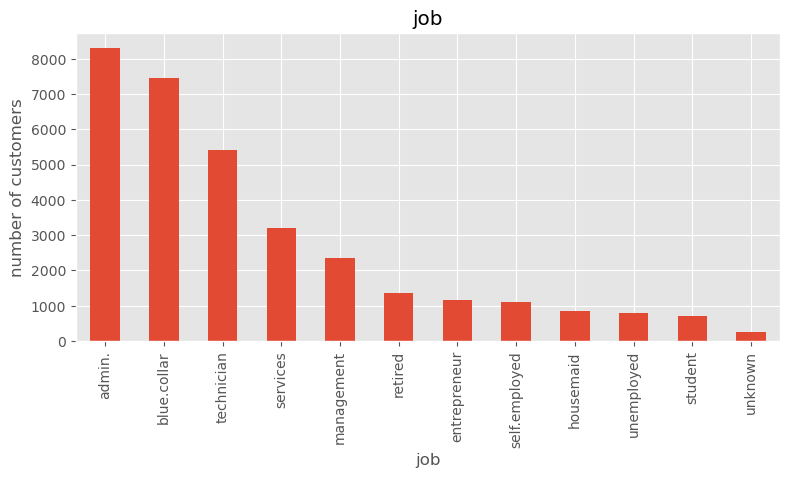

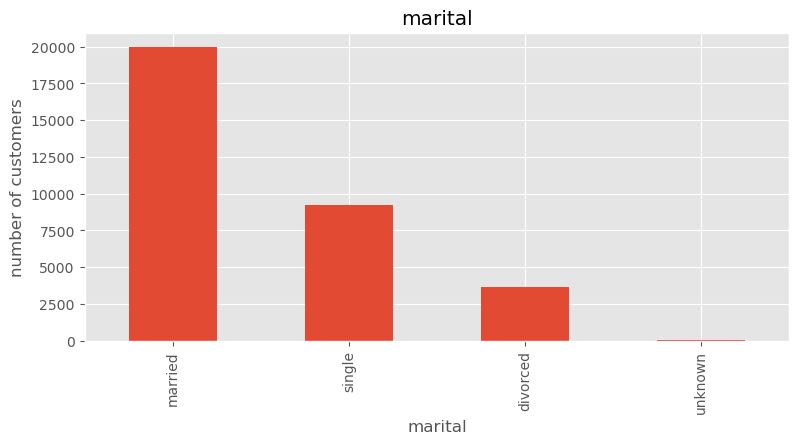

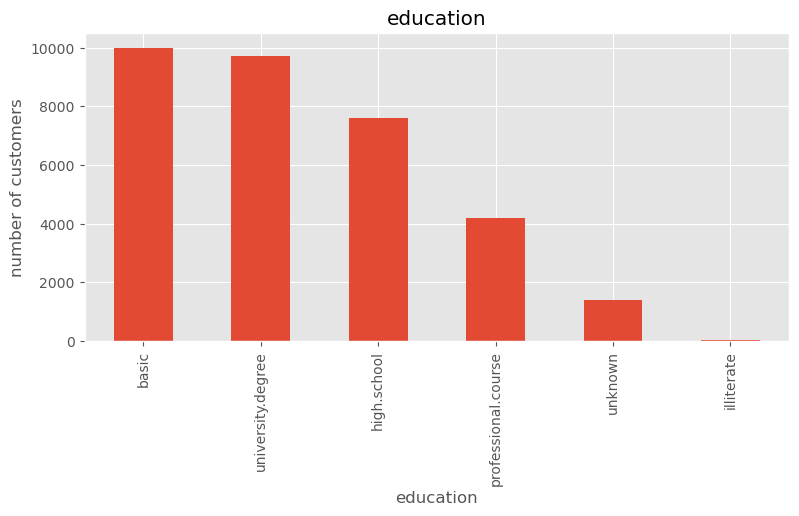

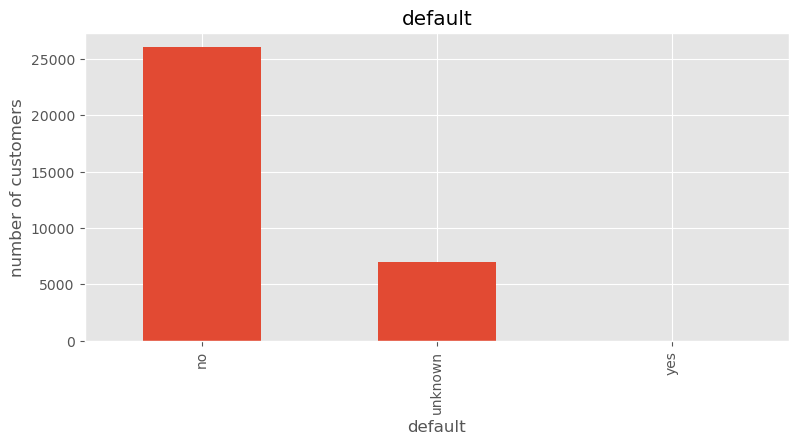

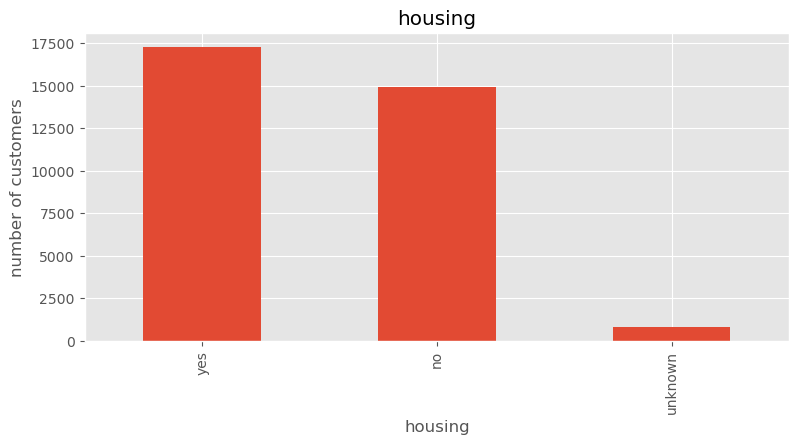

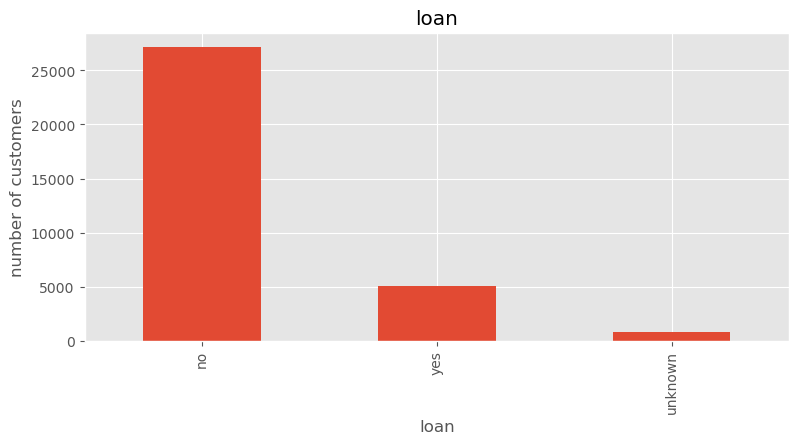

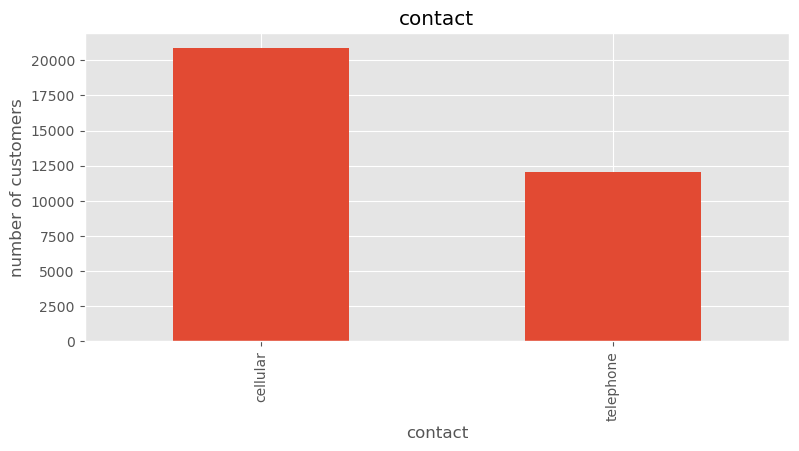

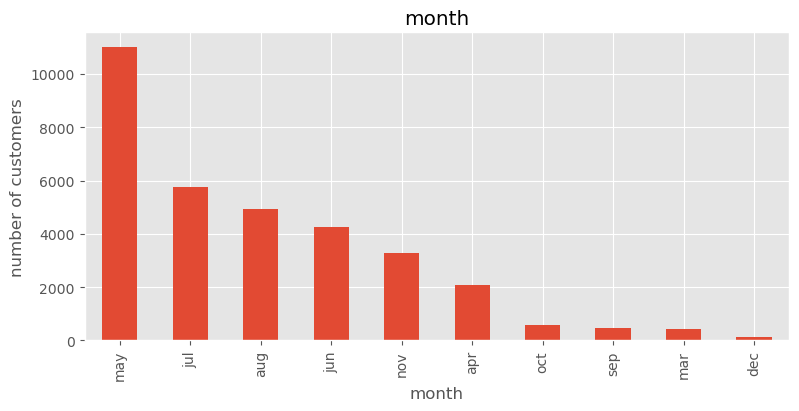

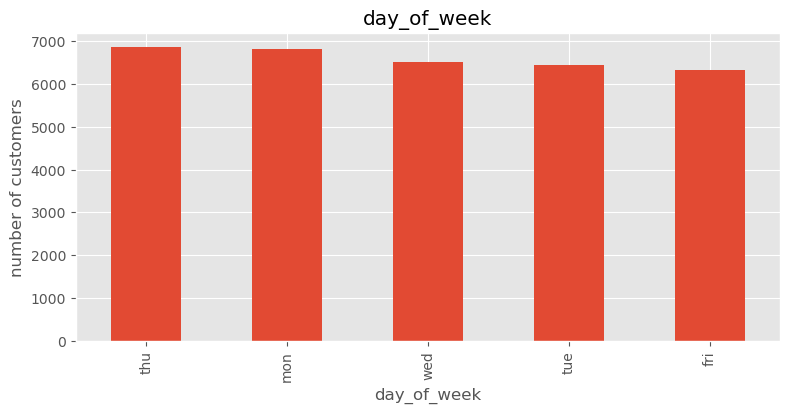

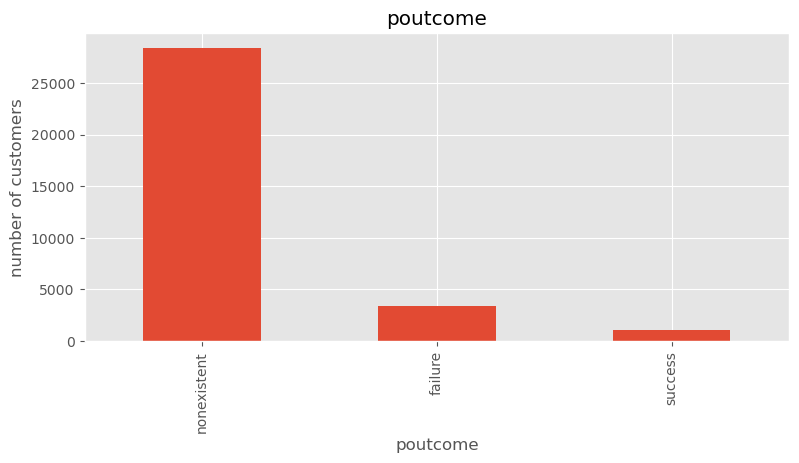

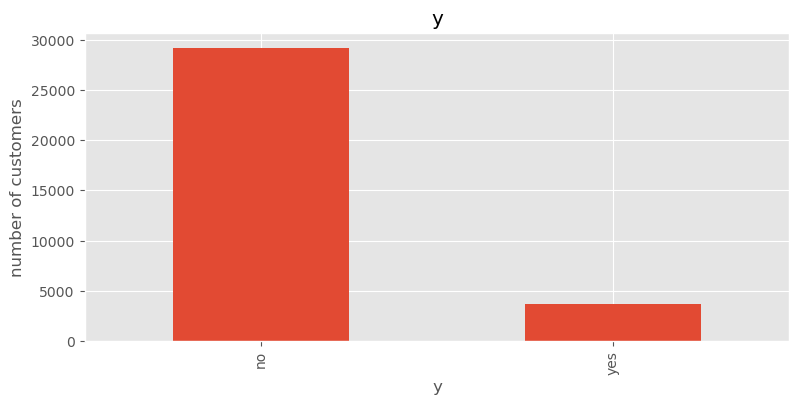

In [14]:
# sorting out the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

OBSERVATION: -The top three professions that our customers belong to are - admin, blue-collar jobs and technicians. -A huge number of the customers are married. -Many of our past customers have applied for a housing loan but very few have applied for personal loans. -Cell-phones seem to be the most favoured method of reaching out to customers. -Many customers have been contacted in the month of May. -The plot for the target variable shows heavy imbalance in the target variable.

In [15]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


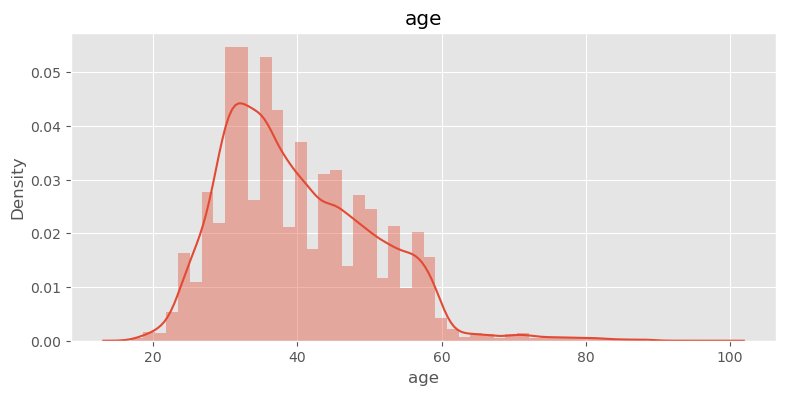

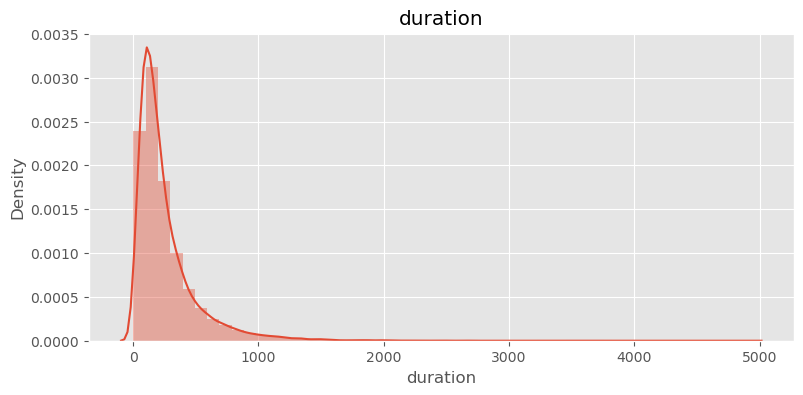

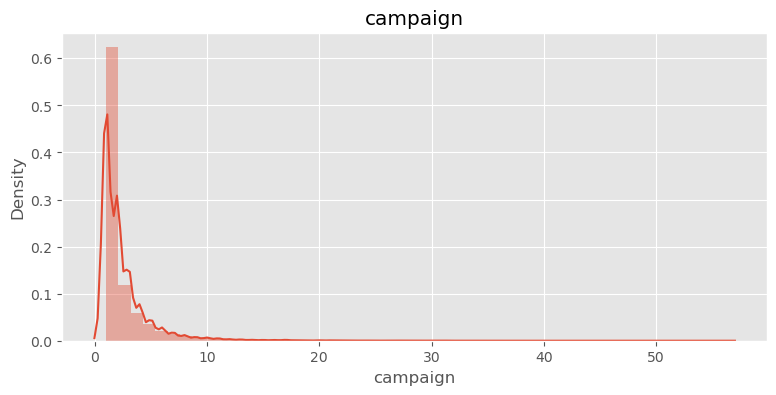

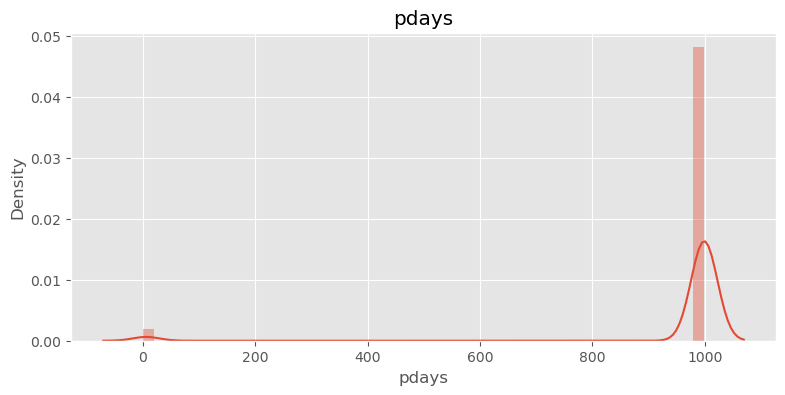

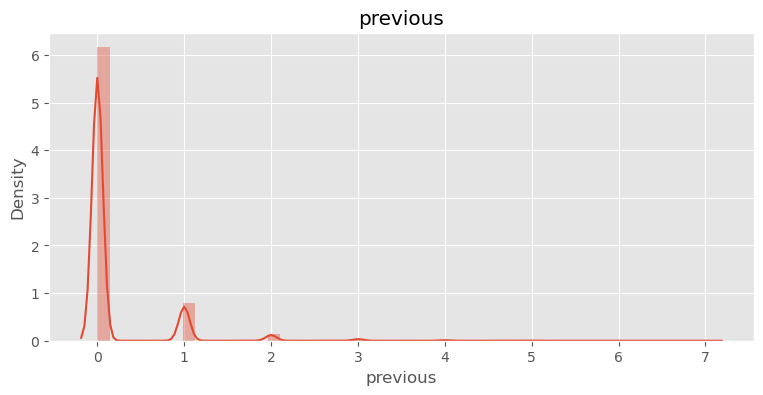

In [16]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign", "pdays", "previous"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

<AxesSubplot:>

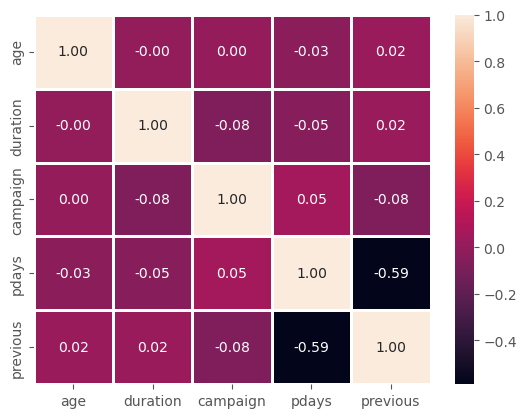

In [17]:
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths=.8)

In [18]:
data["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'target variable')

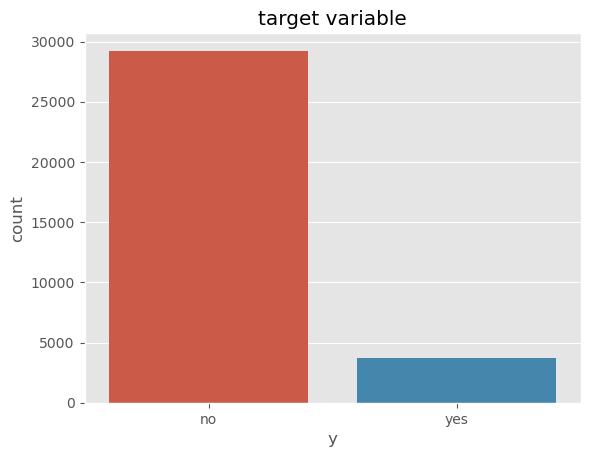

In [19]:
sns.countplot(data["y"])
plt.title("target variable")

In [20]:
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


In [21]:
#there is imbalance in our target variable

In [22]:
df = data.copy()

In [23]:
#data preparation: Create the target variable by mapping yes to 1 and no to 0.
bank = {
    "yes":1,
    "no":0
}
df["y"] = df.y.map(bank)

# Feature importance - mutual information

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df.y)

In [26]:
mi = df[cat_var].apply(mutual_info_y_score)
mi.sort_values(ascending=False)

y              3.520316e-01
poutcome       3.046758e-02
month          2.630360e-02
contact        1.137912e-02
job            9.753729e-03
default        5.738041e-03
education      2.289476e-03
marital        1.606817e-03
day_of_week    1.974791e-04
housing        4.834614e-05
loan           1.392232e-07
dtype: float64

# Splitting the datasets

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
y_full_train = df_full_train.y.values

In [29]:
len(df_train), len(df_val), len(df_test)

(19770, 6590, 6590)

In [30]:
#deleting target variable
del df_train['y']
del df_val['y']
del df_test['y']

# One hot encoding

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
#one-hot encoding
dict_train = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)


# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [34]:
dict_train = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [37]:
roc_auc_score(y_val, y_pred)

0.7083529278798689

In [38]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

Our validation dataset performed badly due to overfitting

In [39]:
#Decision Tree Parameter Tuning

scores = []

for d in [4, 5, 6, 10]:

    for s in [1, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [40]:
columns = ['max-depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max-depth,min_samples_leaf,auc
0,4,1,0.819421
1,4,5,0.819421
2,4,10,0.819421
3,4,15,0.819358
4,4,20,0.819358


In [41]:
df_scores.sort_values(by='auc', ascending=False).head()

,max-depth,min_samples_leaf,auc
32,10,50,0.907279
33,10,100,0.906879
31,10,20,0.905411
34,10,200,0.903341
30,10,15,0.902197


In [42]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)

In [43]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9072791812575544

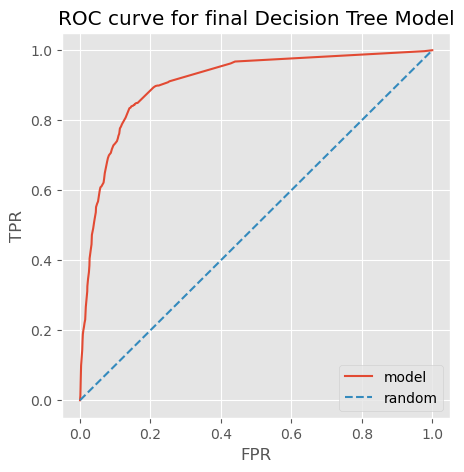

In [44]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for final Decision Tree Model")
plt.show()

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [47]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8970074955326734

In [48]:
# Random Forest Parameter Tuning
scores = []

for n in range (10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [49]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [50]:
df_scores

,n_estimators,auc
0,10,0.897007
1,20,0.910949
2,30,0.916591
3,40,0.919400
4,50,0.921509
5,60,0.922320
6,70,0.923351
7,80,0.922964
8,90,0.923644
9,100,0.923994


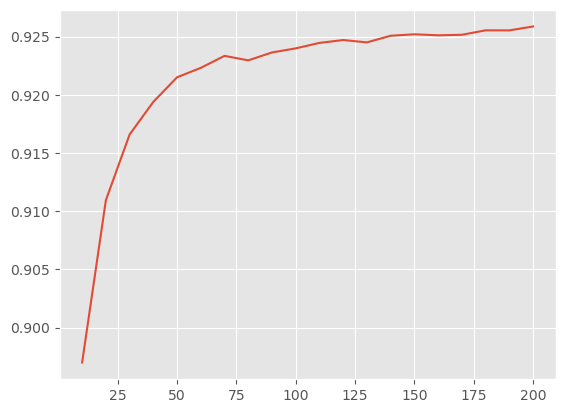

In [51]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [52]:
scores = []

for d in [5, 10, 15]:
    for n in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [53]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.900427
1,5,20,0.903018
2,5,30,0.905339
3,5,40,0.908456
4,5,50,0.907631


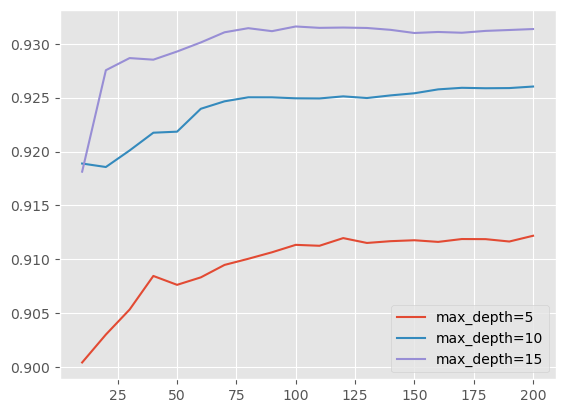

In [54]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' %d)
    
plt.legend()

In [55]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=15,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [56]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.918132
1,1,20,0.927546
2,1,30,0.928672
3,1,40,0.928524
4,1,50,0.929281


In [57]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

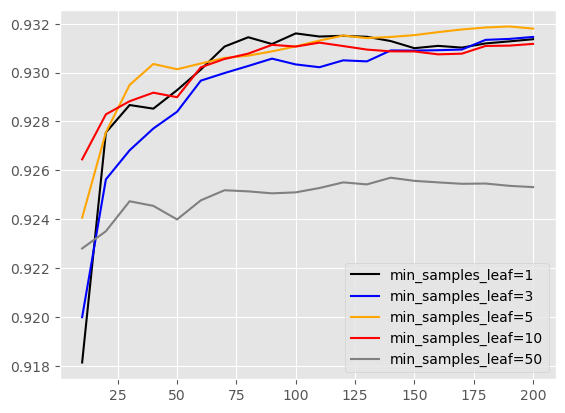

In [58]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in  zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
    
plt.legend()
    

In [59]:
#Final model
rf = RandomForestClassifier(n_estimators=150,
                            max_depth=15,
                            min_samples_leaf=5,
                            random_state=1,
                            n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=150,
                       n_jobs=-1, random_state=1)

In [60]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9315340648170335

# XGBoost model

In [61]:
import xgboost as xgb

In [62]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [63]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [64]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9305064013455727

In [65]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [66]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [67]:
print(output.stdout)

[0]	train-auc:0.86283	val-auc:0.87121
[5]	train-auc:0.92605	val-auc:0.92315
[10]	train-auc:0.93958	val-auc:0.93135
[15]	train-auc:0.94655	val-auc:0.93372
[20]	train-auc:0.95033	val-auc:0.93418
[25]	train-auc:0.95343	val-auc:0.93431
[30]	train-auc:0.95770	val-auc:0.93449
[35]	train-auc:0.96139	val-auc:0.93388
[40]	train-auc:0.96343	val-auc:0.93349
[45]	train-auc:0.96575	val-auc:0.93251
[50]	train-auc:0.96770	val-auc:0.93196
[55]	train-auc:0.97043	val-auc:0.93115
[60]	train-auc:0.97157	val-auc:0.93100
[65]	train-auc:0.97268	val-auc:0.93095
[70]	train-auc:0.97378	val-auc:0.93079
[75]	train-auc:0.97584	val-auc:0.93071
[80]	train-auc:0.97733	val-auc:0.93030
[85]	train-auc:0.97952	val-auc:0.92969
[90]	train-auc:0.98061	val-auc:0.92929
[95]	train-auc:0.98164	val-auc:0.92894
[100]	train-auc:0.98215	val-auc:0.92867
[105]	train-auc:0.98348	val-auc:0.92827
[110]	train-auc:0.98498	val-auc:0.92804
[115]	train-auc:0.98599	val-auc:0.92770
[120]	train-auc:0.98694	val-auc:0.92731
[125]	train-auc:0.9874

In [68]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [69]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.86283,0.87121
1,5,0.92605,0.92315
2,10,0.93958,0.93135
3,15,0.94655,0.93372
4,20,0.95033,0.93418
5,25,0.95343,0.93431
6,30,0.95770,0.93449
7,35,0.96139,0.93388
8,40,0.96343,0.93349
9,45,0.96575,0.93251


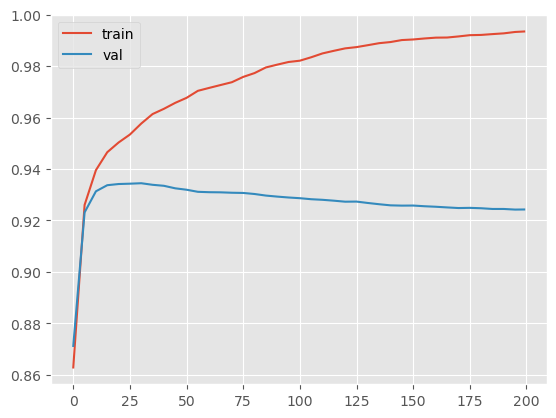

In [70]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [71]:
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
6,30,0.9577,0.93449


 parameter tuning for XGboost

In [72]:
scores = {}
etas = [0.01, 0.05, 0.1, 0.3, 0.5, 1]

In [73]:
%%capture output

xgb_params = {
    'eta': 0.01,    
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [74]:
key = f'eta={etas[0]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = eta=0.01


In [75]:
scores[key]

,num_iter,train_auc,val_auc
0,0,0.86283,0.87121
1,5,0.86337,0.87137
2,10,0.87382,0.88508
3,15,0.87416,0.88534
4,20,0.87450,0.88539
5,25,0.88491,0.89666
6,30,0.89393,0.90358
7,35,0.89430,0.90386
8,40,0.89834,0.90508
9,45,0.89869,0.90486


In [76]:
%%capture output

xgb_params['eta'] = etas[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [77]:
key = f'eta={etas[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.05


In [78]:
%%capture output

xgb_params['eta'] = etas[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [79]:
key = f'eta={etas[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.1


In [80]:
%%capture output

xgb_params['eta'] = etas[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [81]:
key = f'eta={etas[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.3


In [82]:
%%capture output

xgb_params['eta'] = etas[4]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [83]:
key = f'eta={etas[4]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.5


In [84]:
%%capture output

xgb_params['eta'] = etas[5]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [85]:
key = f'eta={etas[5]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=1


In [86]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=1'])

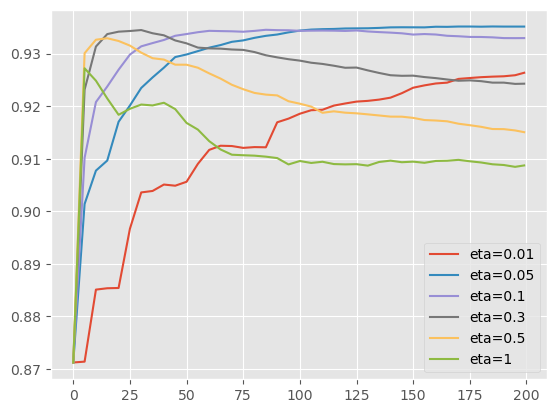

In [87]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [88]:
#tuning the parameter max_depth
scores = {}
max_depths = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [89]:
%%capture output

xgb_params = {
    'eta': 0.1,    
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5,evals=watchlist)

In [90]:
key = f'max_depth={max_depths[0]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=1


In [91]:
%%capture output

xgb_params['max_depth'] = max_depths[1]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [92]:
key = f'max_depth={max_depths[1]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=2


In [93]:
%%capture output

xgb_params['max_depth'] = max_depths[2]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [94]:
key = f'max_depth={max_depths[2]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=4


In [95]:
%%capture output

xgb_params['max_depth'] = max_depths[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [96]:
key = f'max_depth={max_depths[3]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=6


In [97]:
%%capture output

xgb_params['max_depth'] = max_depths[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [98]:
key = f'max_depth={max_depths[4]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=8


In [99]:
%%capture output

xgb_params['max_depth'] = max_depths[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [100]:
key = f'max_depth={max_depths[5]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=10


In [101]:
%%capture output

xgb_params['max_depth'] = max_depths[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [102]:
key = f'max_depth={max_depths[6]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=12


In [103]:
%%capture output

xgb_params['max_depth'] = max_depths[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [104]:
key = f'max_depth={max_depths[7]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=14


In [105]:
%%capture output

xgb_params['max_depth'] = max_depths[8]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [106]:
key = f'max_depth={max_depths[8]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=16


In [107]:
%%capture output

xgb_params['max_depth'] = max_depths[9]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [108]:
key = f'max_depth={max_depths[9]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=18


In [109]:
%%capture output

xgb_params['max_depth'] = max_depths[10]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [110]:
key = f'max_depth={max_depths[10]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=20


In [111]:
scores.keys()

dict_keys(['max_depth=1', 'max_depth=2', 'max_depth=4', 'max_depth=6', 'max_depth=8', 'max_depth=10', 'max_depth=12', 'max_depth=14', 'max_depth=16', 'max_depth=18', 'max_depth=20'])

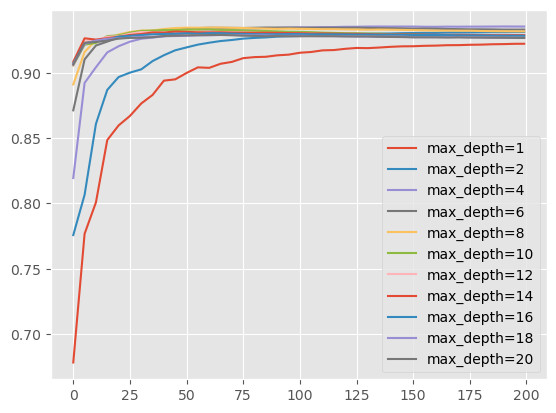

In [112]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

(0.9, 0.95)

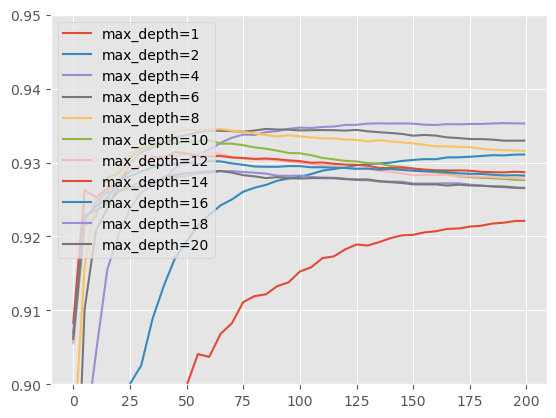

In [113]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.90,0.95)

tuning the parameter min_child_weight

In [114]:
scores = {}
child_weights = [1, 2, 4, 5, 10, 15, 20, 25, 30, 35, 40]

In [115]:
%%capture output

xgb_params = {
    'eta': 0.1,    
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5,evals=watchlist)

In [116]:
key = f'min_child_weight={child_weights[0]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=1


In [117]:
%%capture output
xgb_params['min_child_weight'] = child_weights[1]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [118]:
key = f'min_child_weight={child_weights[1]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=2


In [119]:
%%capture output
xgb_params['min_child_weight'] = child_weights[2]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [120]:
key = f'min_child_weight={child_weights[2]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=4


In [121]:
%%capture output
xgb_params['min_child_weight'] = child_weights[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [122]:
key = f'min_child_weight={child_weights[3]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=5


In [123]:
%%capture output
xgb_params['min_child_weight'] = child_weights[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [124]:
key = f'min_child_weight={child_weights[4]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=10


In [125]:
%%capture output
xgb_params['min_child_weight'] = child_weights[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [126]:
key = f'min_child_weight={child_weights[5]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=15


In [127]:
%%capture output
xgb_params['min_child_weight'] = child_weights[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [128]:
key = f'min_child_weight={child_weights[6]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=20


In [129]:
%%capture output
xgb_params['min_child_weight'] = child_weights[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [130]:
key = f'min_child_weight={child_weights[7]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=25


In [131]:
%%capture output
xgb_params['min_child_weight'] = child_weights[8]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [132]:
key = f'min_child_weight={child_weights[8]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=30


In [133]:
%%capture output
xgb_params['min_child_weight'] = child_weights[9]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [134]:
key = f'min_child_weight={child_weights[9]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=35


In [135]:
%%capture output
xgb_params['min_child_weight'] = child_weights[10]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [136]:
key = f'min_child_weight={child_weights[10]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=40


In [137]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=2', 'min_child_weight=4', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=25', 'min_child_weight=30', 'min_child_weight=35', 'min_child_weight=40'])

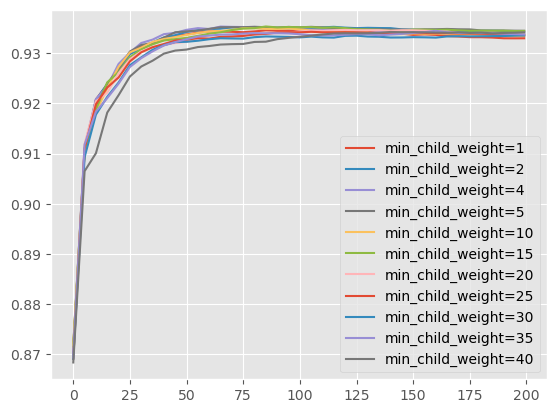

In [138]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

(0.93, 0.94)

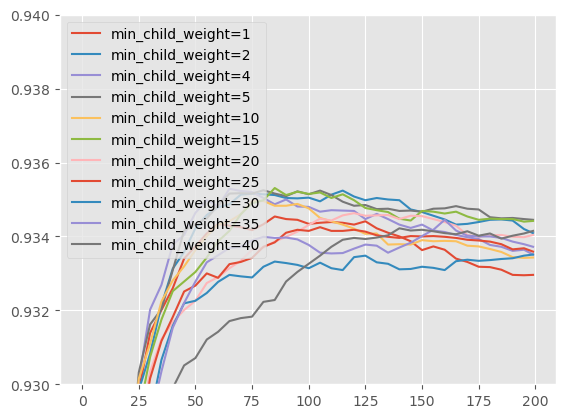

In [139]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.93,0.94)

In [140]:
xgb_params = {
    'eta': 0.1,    
    'max_depth': 4,
    'min_child_weight': 15,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=190)

In [141]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9343478532088212

# Training the best model (XGBoost) on full train dataset

Since Xgboost has the best model we use it and train the full train dataset

In [142]:
dv = DictVectorizer(sparse = False)

full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')


X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

features = dv.get_feature_names()
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [143]:
xgb_params = {
    'eta': 0.1,    
    'max_depth': 4,
    'min_child_weight': 15,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=190)

In [144]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8201906834365816

# Saving the final model

In [145]:
import pickle

In [146]:
output_file = 'model.bin'
output_file

'model.bin'

In [147]:
#load saved data
with open(output_file,'wb') as f_out: 
    pickle.dump((dv, model), f_out)